In [1]:
import re
import numpy as np

from scipy.spatial.distance import cosine

with open('sentences.txt', 'r') as f:
	sentences = []
	words = []
	for line in f:
		line_list = re.split('[^a-z]', line.strip('\\n\\r.').lower())
		line_list = list(filter(None, line_list))
		sentences.append(line_list)
		words += line_list

		words_set = set(words)
		i = iter(range(len(words_set)))
		words_dict = {next(i):word for word in words_set}

		n, d = len(sentences), len(words_dict)
		word_matrix = np.zeros(shape=(n, d))
		for i in range(n):
			for j in range(d):
				word_matrix[i][j] = sentences[i].count(words_dict[j])
		
		cos_0 = []
		for i in range(n):
			cos_0.append(cosine(word_matrix[0], word_matrix[i]))
		cos_0 = np.array(cos_0)
		cos_0[1:].argsort()
print(cos_0[1:3])

[0.95275444 0.86447381]


[-0.00823565  0.19333685 -1.29552587  4.36264154]


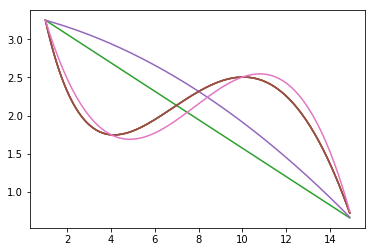

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.linalg import solve

def f(x):
    return (np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2))

x = np.arange(1, 15, 0.1)
y = f(x)
plt.plot(x, y)

A = np.matrix('1 1; 1 15')
B = np.array([f(1), f(15)])
w_1 = np.polynomial.polynomial.Polynomial(solve(A, B))

y_1 = w_1(x)
plt.plot(x, y, '-', x, y_1, '-')



x_2 = np.array([1, 8, 15])
line_2 = np.polyfit(x_2, f(x_2), 2)
w_2 = np.poly1d(line_2)
y_2 = w_2(x)
plt.plot(x, y, '-', x, y_2, '-')

x_3 = np.array([1, 4, 10, 15])
line_3 = np.polyfit(x_3, f(x_3), 3)
w_3 = np.poly1d(line_3)
y_3 = w_3(x)
plt.plot(x, y, '-',  x, y_3, '-')

print(line_3)

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

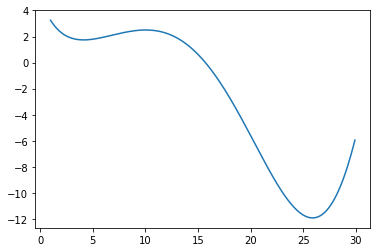

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from scipy.optimize import minimize

def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)
x = np.arange(1, 30, 0.1)
y = f(x)
plt.plot(x, y)
minimize(f, 25)

minimize(f, 2, method="BFGS")

minimize(f, 30, method="BFGS")
         
         